# Keara Toop's SLP Deliverable #3 Code

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#read in file
mxmh = pd.read_csv("mxmh_survey_results.csv") #mxmh stands for "Music and Mental Health"

##Preparing the data

In [3]:
#make separate dataframe that includes only the frequency columns
frequency = mxmh[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

frequency.head()

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes
1,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely
2,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently
3,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never
4,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely


In [4]:
frequency.shape
#there are 16 columns, so 16 different genres included

(736, 16)

In [5]:
#changing the frequency data to be numeric (vs categorical)
# 1 - Never. 2 - Rarely. 3 - Sometimes. 4 - Very frequently
#this standardized the scale, so no need to use StandardScaler

frequency.replace(["Never", "Rarely", "Sometimes", "Very frequently"], ["1", "2", "3", "4"], inplace=True)

#to convert the values to numeric
frequency = frequency.apply(pd.to_numeric, errors='coerce')

<ipython-input-5-2b6c0d7eb321>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency.replace(["Never", "Rarely", "Sometimes", "Very frequently"], ["1", "2", "3", "4"], inplace=True)


In [6]:
#check that the columns are integers
print(frequency.dtypes)

Frequency [Classical]           int64
Frequency [Country]             int64
Frequency [EDM]                 int64
Frequency [Folk]                int64
Frequency [Gospel]              int64
Frequency [Hip hop]             int64
Frequency [Jazz]                int64
Frequency [K pop]               int64
Frequency [Latin]               int64
Frequency [Lofi]                int64
Frequency [Metal]               int64
Frequency [Pop]                 int64
Frequency [R&B]                 int64
Frequency [Rap]                 int64
Frequency [Rock]                int64
Frequency [Video game music]    int64
dtype: object


In [7]:
frequency.head()

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,2,1,2,1,1,3,1,4,4,2,1,4,3,4,1,3
1,3,1,1,2,3,2,4,2,3,2,1,3,3,2,4,2
2,1,1,4,1,1,2,2,4,1,3,3,2,1,2,2,4
3,3,1,1,2,3,1,4,3,4,3,1,3,3,1,1,1
4,1,1,2,1,2,4,1,4,3,3,1,3,4,4,1,2


##Conducting k-means

Text(0, 0.5, 'cumulative explained variance')

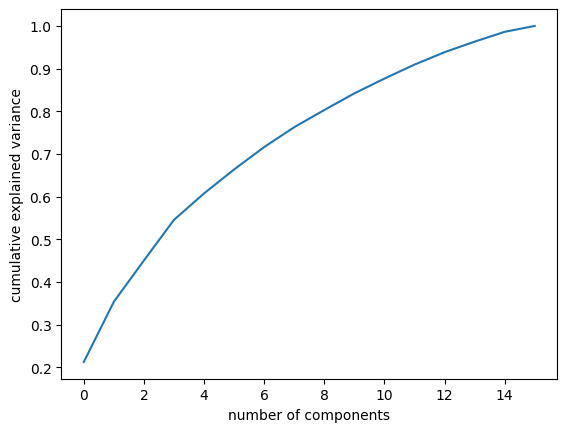

In [8]:
#using PCA to figure out how many components are nneded for a high enough cev (over 0.9)
my_model = PCA(n_components=16) #the 16 comes from 16 columns in the df after my cleaning (also 16 in features)
my_model.fit_transform(frequency)

#plotting the graph
plt.plot(my_model.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [9]:
#to figure out how many clusters to use - part 1
sse = []
for k in range(1, 50):
    print(k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(frequency)
    sse.append(kmeans.inertia_)

1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


21
22


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


23


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


27


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


28


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


29


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


33


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


35


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


36


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


39


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


41


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


42


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


43


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


44
45


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


46


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


47


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


48


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


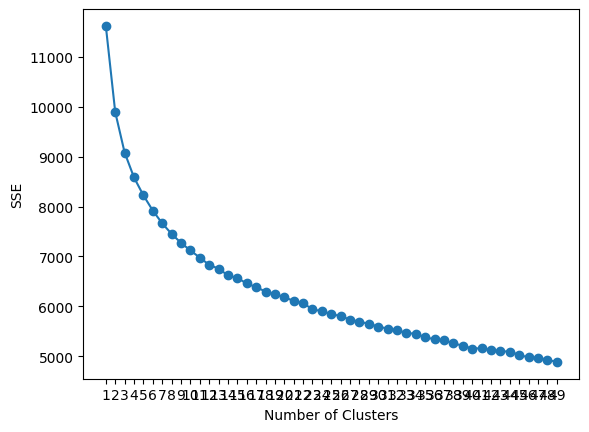

In [10]:
#to figure out how many clusters to use - part 2, the graph
plt.plot(range(1, len(sse)+1), sse, marker='o')
plt.xticks(range(1, len(sse)+1))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering Results with K=15')

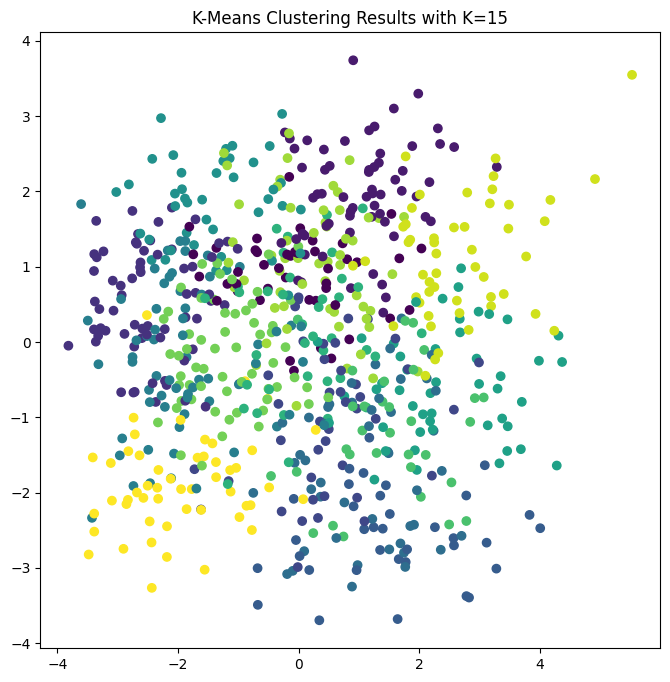

In [11]:
#creating the actual model
#using 15 clusters and 12 components
model = KMeans(n_clusters = 15, random_state = 42)
cluster_labels = model.fit_predict(frequency)

dims = PCA(n_components=12)
pca_dims = dims.fit_transform(frequency)

#to plot the graph
fig, ax = plt.subplots(1, 1, figsize=(8,8))
#only plots first two cols
ax.scatter(pca_dims[:,0], pca_dims[:,1], c=cluster_labels)
ax.set_title("K-Means Clustering Results with K=15")

##Formatting mxmh for analysis

In [12]:
#editing mxmh to show the numerical frequencies
mxmh.replace(["Never", "Rarely", "Sometimes", "Very frequently"], ["1", "2", "3", "4"], inplace=True)

columns_to_convert = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]

#convert specified columns to numeric using apply
mxmh[columns_to_convert] = mxmh[columns_to_convert].apply(pd.to_numeric)

In [13]:
mxmh["cluster_label"] = model.labels_

In [14]:
mxmh["cluster_label"].value_counts()

cluster_label
2     65
6     63
1     63
11    60
12    56
14    51
13    50
8     48
5     46
0     44
3     43
7     42
9     38
4     35
10    32
Name: count, dtype: int64

In [15]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_row", 100)

In [16]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,cluster_label
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,2,1,2,1,1,3,1,4,4,2,1,4,3,4,1,3,3.0,0.0,1.0,0.0,NaN,I understand.,4
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,3,1,1,2,3,2,4,2,3,2,1,3,3,2,4,2,7.0,2.0,2.0,1.0,NaN,I understand.,9
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,1,1,4,1,1,2,2,4,1,3,3,2,1,2,2,4,7.0,7.0,10.0,2.0,No effect,I understand.,3
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,3,1,1,2,3,1,4,3,4,3,1,3,3,1,1,1,9.0,7.0,3.0,3.0,Improve,I understand.,10
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,1,1,2,1,2,4,1,4,3,3,1,3,4,4,1,2,7.0,2.0,5.0,9.0,Improve,I understand.,4


## Looking at the clusters vs. Mental Illness

In [17]:
anxiety_clusters = mxmh.groupby("cluster_label")["Anxiety"].mean()
print(anxiety_clusters)

cluster_label
0     6.431818
1     6.396825
2     5.338462
3     5.488372
4     5.800000
5     5.217391
6     5.809524
7     6.214286
8     5.614583
9     5.447368
10    5.437500
11    5.950000
12    6.142857
13    6.460000
14    5.549020
Name: Anxiety, dtype: float64


<ipython-input-18-d17868cc7dd6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='cluster_label', y='Anxiety', data=mxmh, palette = ['mediumvioletred'], size = 1.4)
<ipython-input-18-d17868cc7dd6>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(x='cluster_label', y='Anxiety', data=mxmh, palette = ['mediumvioletred'], size = 1.4)


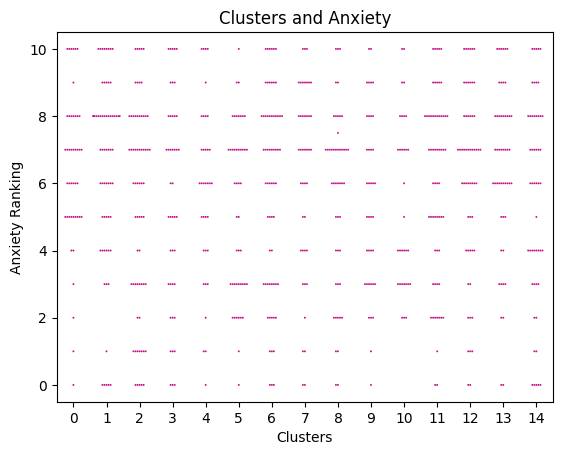

In [18]:
#swarm plot
sns.swarmplot(x='cluster_label', y='Anxiety', data=mxmh, palette = ['mediumvioletred'], size = 1.4)

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Anxiety Ranking')
plt.title('Clusters and Anxiety')

# Show the plot
plt.show()

<ipython-input-19-30bf98851764>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anxiety_clusters.index, y='Anxiety', data=anxiety_clusters.reset_index(), palette = ['mediumvioletred'])
<ipython-input-19-30bf98851764>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=anxiety_clusters.index, y='Anxiety', data=anxiety_clusters.reset_index(), palette = ['mediumvioletred'])


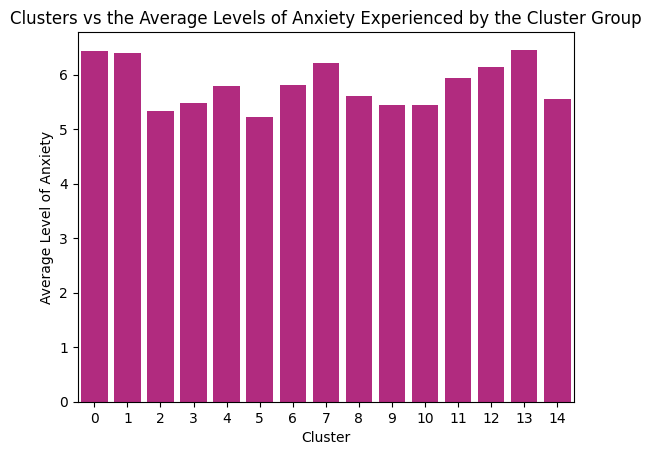

In [19]:
#bar plot version of same info
sns.barplot(x=anxiety_clusters.index, y='Anxiety', data=anxiety_clusters.reset_index(), palette = ['mediumvioletred'])
plt.xlabel('Cluster')
plt.ylabel('Average Level of Anxiety')
plt.title('Clusters vs the Average Levels of Anxiety Experienced by the Cluster Group')
plt.show()

In [20]:
depression_clusters = mxmh.groupby("cluster_label")["Depression"].mean()
print(depression_clusters)

cluster_label
0     6.000000
1     5.984127
2     4.523077
3     4.697674
4     3.514286
5     4.673913
6     4.468254
7     5.238095
8     4.687500
9     4.263158
10    4.031250
11    4.583333
12    5.723214
13    5.440000
14    3.333333
Name: Depression, dtype: float64


<ipython-input-21-bdbc090a79eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='cluster_label', y='Depression', data=mxmh, palette = ['mediumblue'], size = 1.4)
<ipython-input-21-bdbc090a79eb>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(x='cluster_label', y='Depression', data=mxmh, palette = ['mediumblue'], size = 1.4)


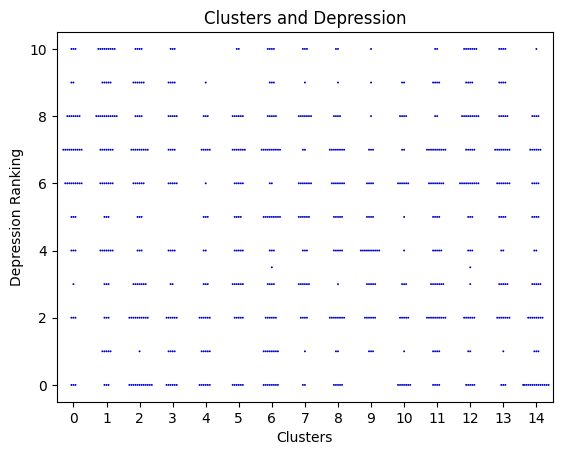

In [21]:
#swarm plot
sns.swarmplot(x='cluster_label', y='Depression', data=mxmh, palette = ['mediumblue'], size = 1.4)

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Depression Ranking')
plt.title('Clusters and Depression')

# Show the plot
plt.show()

<ipython-input-22-c0eef2eb9de1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depression_clusters.index, y='Depression', data=depression_clusters.reset_index(), palette = ['mediumblue'])
<ipython-input-22-c0eef2eb9de1>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=depression_clusters.index, y='Depression', data=depression_clusters.reset_index(), palette = ['mediumblue'])


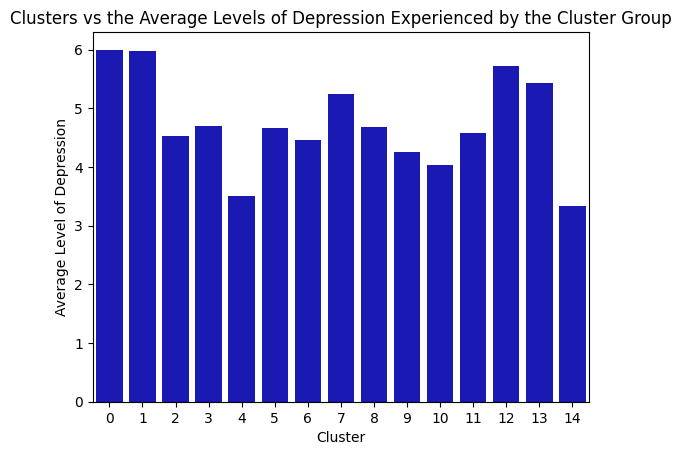

In [22]:
#bar plot version of same info
sns.barplot(x=depression_clusters.index, y='Depression', data=depression_clusters.reset_index(), palette = ['mediumblue'])
plt.xlabel('Cluster')
plt.ylabel('Average Level of Depression')
plt.title('Clusters vs the Average Levels of Depression Experienced by the Cluster Group')
plt.show()

In [23]:
insomnia_clusters = mxmh.groupby("cluster_label")["Insomnia"].mean()
print(insomnia_clusters)

cluster_label
0     4.863636
1     4.269841
2     3.784615
3     3.976744
4     3.400000
5     2.586957
6     3.301587
7     4.119048
8     3.854167
9     3.078947
10    2.593750
11    3.466667
12    4.330357
13    4.460000
14    3.411765
Name: Insomnia, dtype: float64


<ipython-input-24-3dcec90d144d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='cluster_label', y='Insomnia', data=mxmh, palette = ['royalblue'], size = 1.4)
<ipython-input-24-3dcec90d144d>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(x='cluster_label', y='Insomnia', data=mxmh, palette = ['royalblue'], size = 1.4)


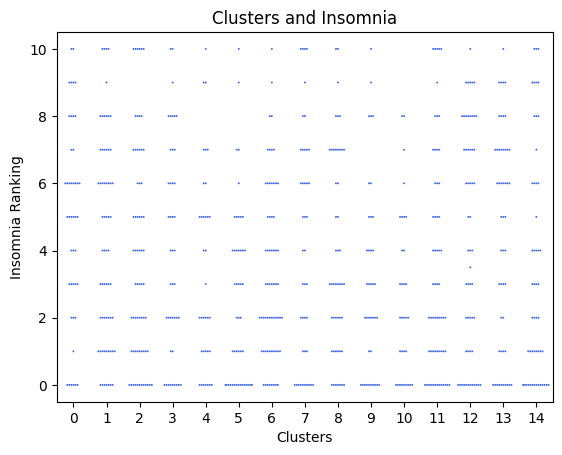

In [24]:
#swarm plot
sns.swarmplot(x='cluster_label', y='Insomnia', data=mxmh, palette = ['royalblue'], size = 1.4)

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Insomnia Ranking')
plt.title('Clusters and Insomnia')

# Show the plot
plt.show()

<ipython-input-25-feef5ed2c764>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=insomnia_clusters.index, y='Insomnia', data=insomnia_clusters.reset_index(), palette = ['royalblue'])
<ipython-input-25-feef5ed2c764>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=insomnia_clusters.index, y='Insomnia', data=insomnia_clusters.reset_index(), palette = ['royalblue'])


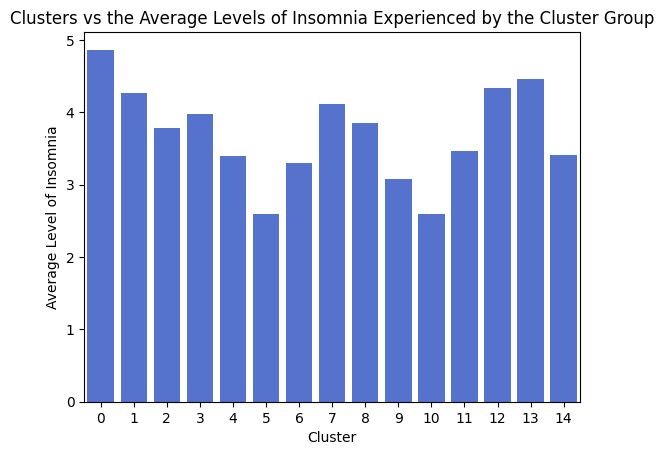

In [25]:
#bar plot version of same info
sns.barplot(x=insomnia_clusters.index, y='Insomnia', data=insomnia_clusters.reset_index(), palette = ['royalblue'])
plt.xlabel('Cluster')
plt.ylabel('Average Level of Insomnia')
plt.title('Clusters vs the Average Levels of Insomnia Experienced by the Cluster Group')
plt.show()

In [26]:
ocd_clusters = mxmh.groupby("cluster_label")["OCD"].mean()
print(ocd_clusters)

cluster_label
0     2.454545
1     3.190476
2     2.384615
3     2.813953
4     3.142857
5     2.304348
6     2.873016
7     2.428571
8     2.718750
9     1.631579
10    2.093750
11    2.766667
12    2.830357
13    2.980000
14    2.431373
Name: OCD, dtype: float64


<ipython-input-27-407e5a9a8241>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='cluster_label', y='OCD', data=mxmh, palette = ['darkmagenta'], size = 1.6)
<ipython-input-27-407e5a9a8241>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(x='cluster_label', y='OCD', data=mxmh, palette = ['darkmagenta'], size = 1.6)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

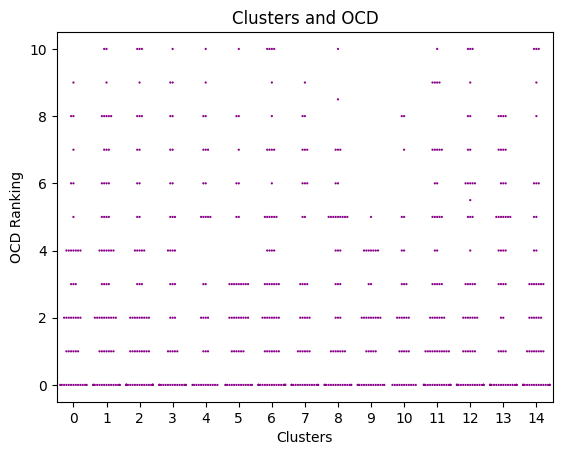

In [27]:
#swarm plot
sns.swarmplot(x='cluster_label', y='OCD', data=mxmh, palette = ['darkmagenta'], size = 1.6)

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('OCD Ranking')
plt.title('Clusters and OCD')

# Show the plot
plt.show()

<ipython-input-28-c31a093877da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ocd_clusters.index, y='OCD', data=ocd_clusters.reset_index(), palette = ['darkmagenta'])
<ipython-input-28-c31a093877da>:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=ocd_clusters.index, y='OCD', data=ocd_clusters.reset_index(), palette = ['darkmagenta'])


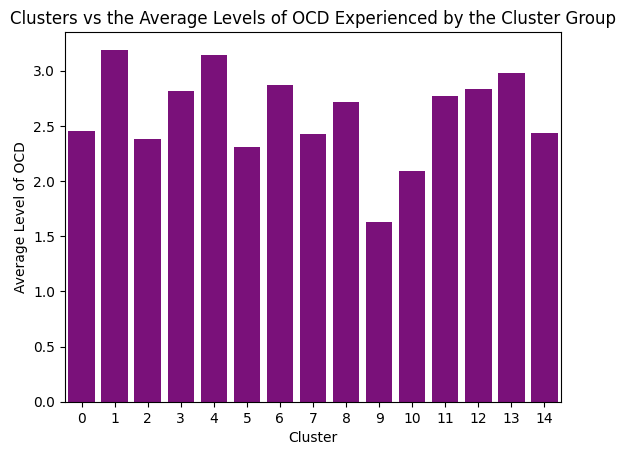

In [28]:
#bar plot version of same info
sns.barplot(x=ocd_clusters.index, y='OCD', data=ocd_clusters.reset_index(), palette = ['darkmagenta'])
plt.xlabel('Cluster')
plt.ylabel('Average Level of OCD')
plt.title('Clusters vs the Average Levels of OCD Experienced by the Cluster Group')
plt.show()

## Based on the Average Scores, look at the clusters for each illness. Picking the the top 3 clusters based on average ranking

In [ ]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,cluster_label
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,2,1,2,1,1,3,1,4,4,2,1,4,3,4,1,3,3.0,0.0,1.0,0.0,NaN,I understand.,4
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,3,1,1,2,3,2,4,2,3,2,1,3,3,2,4,2,7.0,2.0,2.0,1.0,NaN,I understand.,9
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,1,1,4,1,1,2,2,4,1,3,3,2,1,2,2,4,7.0,7.0,10.0,2.0,No effect,I understand.,3
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,3,1,1,2,3,1,4,3,4,3,1,3,3,1,1,1,9.0,7.0,3.0,3.0,Improve,I understand.,10
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,1,1,2,1,2,4,1,4,3,3,1,3,4,4,1,2,7.0,2.0,5.0,9.0,Improve,I understand.,4


###Clusters for Anxiety
Cluster Numbers: 13, 0, 1

In [ ]:
#starting with cluster 13, what are the rankings for each genre based on the total number of rankings for cluster 13

#subset the DataFrame to show only rows where "cluster" column equals 13
anxiety_13 = mxmh[mxmh['cluster_label'] == 13]

anxiety_13 = anxiety_13[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]


#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in anxiety_13.columns:
    percentage_results[col] = {}
    total_rows_df = anxiety_13.shape[0] * anxiety_13.shape[1]
    for val in range(1, 5):
        count_val = (anxiety_13[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

#why calculate the percentage on the total number of rankings in the df for cluster 13?
  #I want to know how important that one ranking is in terms of the whole cluster.
  #EX: Hip Hop rating 4: this has 4.88% of all of the ratings in cluster 13, so it's very important


Anxiety, cluster 13:
*   Highest ranking for 4: Hip Hop, Rap, Rock
*   Highest ranking for 3: Country, Latin, EDM
*   Highest ranking for 2: Classical, Video Game Music, K pop
*   Highest ranking for 1: Gospel, K pop, Video Game Music



In [ ]:
#cluster 0, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 0
anxiety_0 = mxmh[mxmh['cluster_label'] == 0]

anxiety_0 = anxiety_0[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in anxiety_0.columns:
    percentage_results[col] = {}
    total_rows_df = anxiety_0.shape[0] * anxiety_0.shape[1]
    for val in range(1, 5):
        count_val = (anxiety_0[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Anxiety, cluster 0:
*   Highest ranking for 4: Rock, Metal, Pop
*   Highest ranking for 3: Rap, Hip Hop, R&B
*   Highest ranking for 2: Classical, Folk, EDM
*   Highest ranking for 1: Gospel, Latin, Jazz

In [ ]:
#cluster 1, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 1
anxiety_1 = mxmh[mxmh['cluster_label'] == 1]

anxiety_1 = anxiety_1[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in anxiety_1.columns:
    percentage_results[col] = {}
    total_rows_df = anxiety_1.shape[0] * anxiety_1.shape[1]
    for val in range(1, 5):
        count_val = (anxiety_1[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Anxiety, cluster 1:
*   Highest ranking for 4: Rock, Video Game Music, Pop
*   Highest ranking for 3: Hip Hop, Rap, Lofi
*   Highest ranking for 2: Country, R&B, K Pop
*   Highest ranking for 1: Gospel, Latin, K Pop

###Clusters for Depression
Cluster Numbers: 0, 1, 12

In [ ]:
#cluster 0, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 0
depression_0 = mxmh[mxmh['cluster_label'] == 0]

depression_0 = depression_0[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in depression_0.columns:
    percentage_results[col] = {}
    total_rows_df = depression_0.shape[0] * depression_0.shape[1]
    for val in range(1, 5):
        count_val = (depression_0[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Depression, cluster 0:
*   Highest ranking for 4: Rock, Metal, Pop
*   Highest ranking for 3: Rap, Hip Hop, Pop
*   Highest ranking for 2: Classical, Folk, EDM
*   Highest ranking for 1: Gospel, Latin, Jazz

In [ ]:
#cluster 1, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 1
depression_1 = mxmh[mxmh['cluster_label'] == 1]

depression_1 = depression_1[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in depression_1.columns:
    percentage_results[col] = {}
    total_rows_df = depression_1.shape[0] * depression_1.shape[1]
    for val in range(1, 5):
        count_val = (depression_1[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Depression, cluster 1:
*   Highest ranking for 4: Rock, Video Game Music, Pop
*   Highest ranking for 3: Hip Hop, Lofi, Folk
*   Highest ranking for 2: Country, R&B, K Pop
*   Highest ranking for 1: Gospel, Latin, K Pop

In [ ]:
#cluster 12, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 12
depression_12 = mxmh[mxmh['cluster_label'] == 12]

depression_12 = depression_12[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in depression_12.columns:
    percentage_results[col] = {}
    total_rows_df = depression_12.shape[0] * depression_12.shape[1]
    for val in range(1, 5):
        count_val = (depression_12[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Depression, cluster 12:
*   Highest ranking for 4: Rock, Metal, Pop
*   Highest ranking for 3: Hip Hop, Rap, Jazz
*   Highest ranking for 2: Lofi, Classical, R&B
*   Highest ranking for 1: Gospel, K Pop, EDM

###Clusters for Insomnia
Cluster Numbers: 0, 13, 12

In [ ]:
#cluster 0, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 0
insomnia_0 = mxmh[mxmh['cluster_label'] == 0]

insomnia_0 = insomnia_0[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in insomnia_0.columns:
    percentage_results[col] = {}
    total_rows_df = insomnia_0.shape[0] * insomnia_0.shape[1]
    for val in range(1, 5):
        count_val = (insomnia_0[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Insomnia, cluster 0:
*   Highest ranking for 4: Rock, Metal, Pop
*   Highest ranking for 3: Rap, Pop, Hip Hop
*   Highest ranking for 2: Classical, Folk, EDM
*   Highest ranking for 1: Gospel, Latin, Jazz

In [ ]:
#cluster 13, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 13
insomnia_13 = mxmh[mxmh['cluster_label'] == 13]

insomnia_13 = insomnia_13[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in insomnia_13.columns:
    percentage_results[col] = {}
    total_rows_df = insomnia_13.shape[0] * insomnia_13.shape[1]
    for val in range(1, 5):
        count_val = (insomnia_13[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Insomnia, cluster 13:
*   Highest ranking for 4: Hip Hop, Rock, Rap
*   Highest ranking for 3: Country, Latin, EDM
*   Highest ranking for 2: Classical, Video Game Music, K Pop
*   Highest ranking for 1: Gospel, K Pop, Video Game Music

In [ ]:
#cluster 12, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 12
insomnia_12 = mxmh[mxmh['cluster_label'] == 12]

insomnia_12 = insomnia_12[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in insomnia_12.columns:
    percentage_results[col] = {}
    total_rows_df = insomnia_12.shape[0] * insomnia_12.shape[1]
    for val in range(1, 5):
        count_val = (insomnia_12[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

Insomnia, cluster 12:
*   Highest ranking for 4: Rock, Metal, Pop
*   Highest ranking for 3: Hip Hop, Rap, Jazz
*   Highest ranking for 2: Lofi, Classical, R&B
*   Highest ranking for 1: Gospel, K Pop, EDM

###Clusters for OCD
Cluster Numbers: 1, 4, 13

In [ ]:
#cluster 1, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 1
ocd_1 = mxmh[mxmh['cluster_label'] == 1]

ocd_1 = ocd_1[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in ocd_1.columns:
    percentage_results[col] = {}
    total_rows_df = ocd_1.shape[0] * ocd_1.shape[1]
    for val in range(1, 5):
        count_val = (ocd_1[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

OCD, cluster 1:
*   Highest ranking for 4: Rock, Video Game Music, Pop
*   Highest ranking for 3: Hip Hop, Lofi, Folk
*   Highest ranking for 2: Country, R&B, K Pop
*   Highest ranking for 1: Gospel, Latin, K Pop

In [ ]:
#cluster 4, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 4
ocd_4 = mxmh[mxmh['cluster_label'] == 4]

ocd_4 = ocd_4[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in ocd_4.columns:
    percentage_results[col] = {}
    total_rows_df = ocd_4.shape[0] * ocd_4.shape[1]
    for val in range(1, 5):
        count_val = (ocd_4[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

OCD, cluster 4:
*   Highest ranking for 4: K Pop, Pop, R&B
*   Highest ranking for 3: Hip Hop, R&B, Latin
*   Highest ranking for 2: Classical, Lofi, Rap
*   Highest ranking for 1: Metal, Gospel, Folk

In [ ]:
#cluster 13, what are the rankings for each genre based on the total number of rankings

#subset the DataFrame to show only rows where "cluster" column equals 13
ocd_13 = mxmh[mxmh['cluster_label'] == 13]

ocd_13 = ocd_13[["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
                  "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                  "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"]]

#calculate percentage for values 1-4 in each column
percentage_results = {}

for col in ocd_13.columns:
    percentage_results[col] = {}
    total_rows_df = ocd_13.shape[0] * ocd_13.shape[1]
    for val in range(1, 5):
        count_val = (ocd_13[col] == val).sum()
        percentage = (count_val / total_rows_df) * 100
        percentage_results[col][val] = percentage

#print the results
for col, values in percentage_results.items():
    print(col)
    for val, percentage in values.items():
        print(f"\tRating {val}: {percentage:.2f}%")

OCD, cluster 13:
*   Highest ranking for 4: Hip Hop, Rock, Rap
*   Highest ranking for 3: Country, Latin, EDM
*   Highest ranking for 2: Classical, Video Game Music, K Pop
*   Highest ranking for 1: Gospel, K Pop, Video Game Music